<a href="https://colab.research.google.com/github/Kumar-Sudhanshu/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Sudhanshu_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path_of_play_store_data = '/content/Play Store Data.csv'
play_store_data = pd.read_csv(file_path_of_play_store_data)

In [5]:
file_path_of_user_review = '/content/User Reviews.csv'
user_review = pd.read_csv(file_path_of_user_review)

# Checking the shape

In [6]:
play_store_data.shape

(10841, 13)

In [7]:
user_review.shape

(64295, 5)

#Finding head


In [ ]:
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


#Finding Tail


In [9]:
play_store_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [10]:
user_review.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


#Concating the data

In [11]:
play_store_data_first = play_store_data.head()
play_store_data_second = play_store_data.tail()
concat_data = pd.concat([play_store_data_first,play_store_data_second],axis=0)
concat_data 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [12]:
user_review_first = user_review.head()
user_review_second = user_review.tail()
concat_data = pd.concat([user_review_first,user_review_second],axis=0)
concat_data 

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [13]:
play_store_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [14]:
user_review.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


#Slicing


In [15]:
play_store_data.loc[10:20,['App','Rating']]

,App,Rating
10,Text on Photo - Fonteee,4.4
11,Name Art Photo Editor - Focus n Filters,4.4
12,Tattoo Name On My Photo Editor,4.2
13,Mandala Coloring Book,4.6
14,3D Color Pixel by Number - Sandbox Art Coloring,4.4
15,Learn To Draw Kawaii Characters,3.2
16,Photo Designer - Write your name with shapes,4.7
17,350 Diy Room Decor Ideas,4.5
18,FlipaClip - Cartoon animation,4.3
19,ibis Paint X,4.6


In [16]:
user_review.loc[10:20,['App','Sentiment_Subjectivity']]

,App,Sentiment_Subjectivity
10,10 Best Foods for You,0.600000
11,10 Best Foods for You,0.100000
12,10 Best Foods for You,0.875000
13,10 Best Foods for You,0.866667
14,10 Best Foods for You,0.511111
15,10 Best Foods for You,NaN
16,10 Best Foods for You,1.000000
17,10 Best Foods for You,0.666667
18,10 Best Foods for You,0.100000
19,10 Best Foods for You,1.000000


#Finding info

In [17]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [18]:
user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [19]:
play_store_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [20]:
user_review.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

#Finding Apps whose ratings are greater then 4.9

In [21]:
ratings_four_plus = play_store_data[play_store_data['Rating']>4.9]
ratings_four_plus[['App','Rating']]

,App,Rating
329,Hojiboy Tojiboyev Life Hacks,5.0
612,American Girls Mobile Numbers,5.0
615,Awake Dating,5.0
633,Spine- The dating app,5.0
636,Girls Live Talk - Free Text and Video Chat,5.0
...,...,...
10721,Mad Dash Fo' Cash,5.0
10742,GKPB FP Online Church,5.0
10776,Monster Ride Pro,5.0
10820,Fr. Daoud Lamei,5.0


In [22]:
play_store_data.Genres.value_counts()

Tools                     842
Entertainment             623
Education                 549
Medical                   463
Business                  460
                         ... 
Arcade;Pretend Play         1
Card;Brain Games            1
Lifestyle;Pretend Play      1
Comics;Creativity           1
Strategy;Creativity         1
Name: Genres, Length: 120, dtype: int64

#Cleaning the Data

In [24]:
play_store_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [27]:
#In the above output we can see 1.9 is coming which is wrong value. So, we can replace it with NaN.
#So, firstly finding in which row 1.9 belongs
play_store_data[play_store_data['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [28]:
#We are able to find the row. Now replacing it with NaN
play_store_data.loc[10472] = play_store_data.loc[10472].shift()
play_store_data['App'].loc[10472] = play_store_data['Category'].loc[10472]
play_store_data['Category'].loc[10472] = np.nan
play_store_data.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [29]:
play_store_data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [30]:
#Data type of Rating is object. If we convert from string to numeric, we can make it easy.
play_store_data['Rating'] = pd.to_numeric(play_store_data['Rating'], errors='coerce')
play_store_data['Rating'].dtype

dtype('float64')

#Finding the Top Categories on Play Store

In [31]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [32]:
y = play_store_data['Category'].value_counts().index
x = play_store_data['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

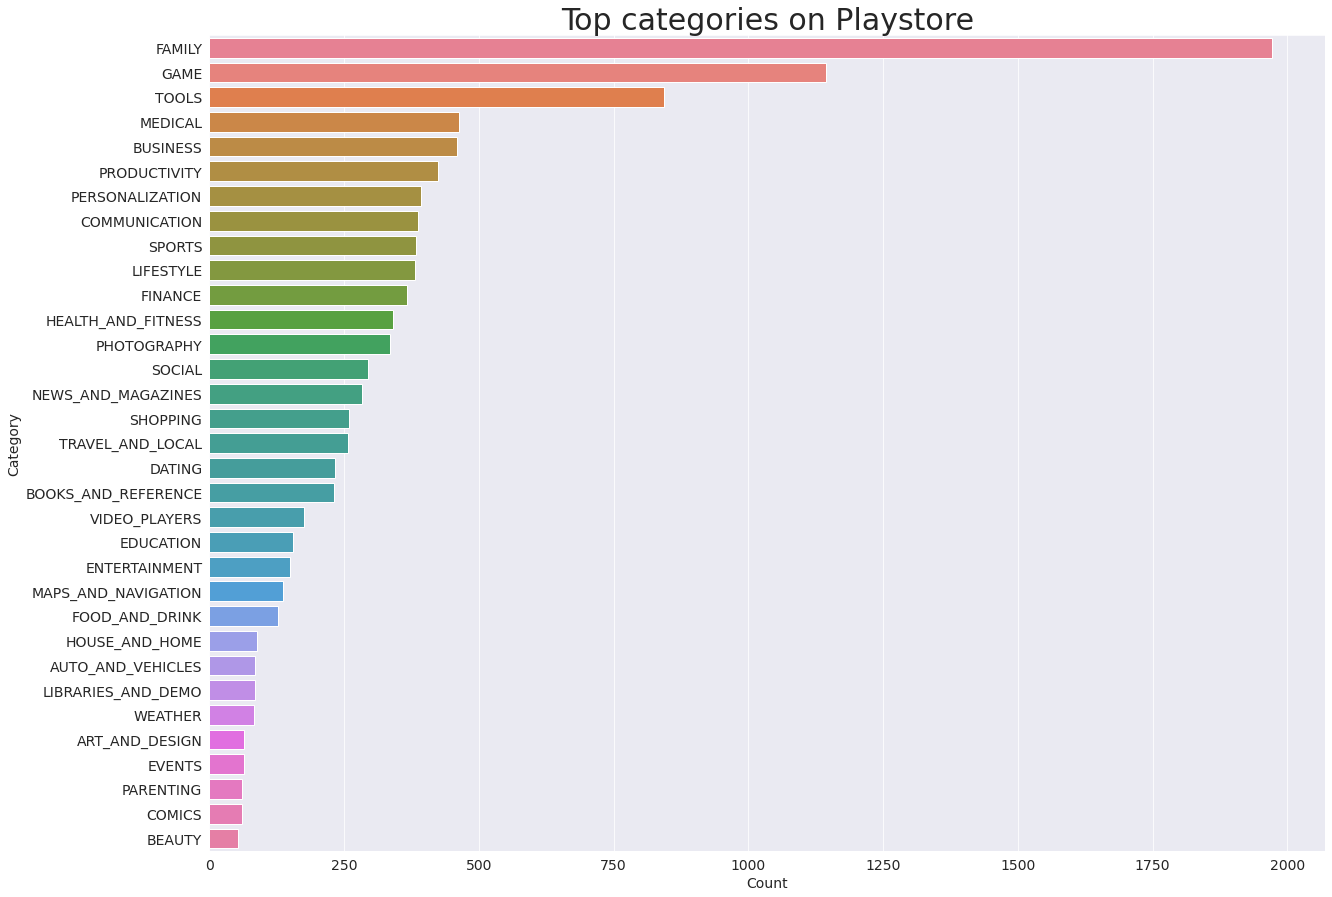

In [33]:
plt.figure(figsize=(20,15))
plt.xlabel("Count")
plt.ylabel("Category")
graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Top categories on Playstore", fontsize = 30);

#Find the Ratings of the Content

In [34]:
x2 = play_store_data['Content Rating'].value_counts().index
y2 = play_store_data['Content Rating'].value_counts()
x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

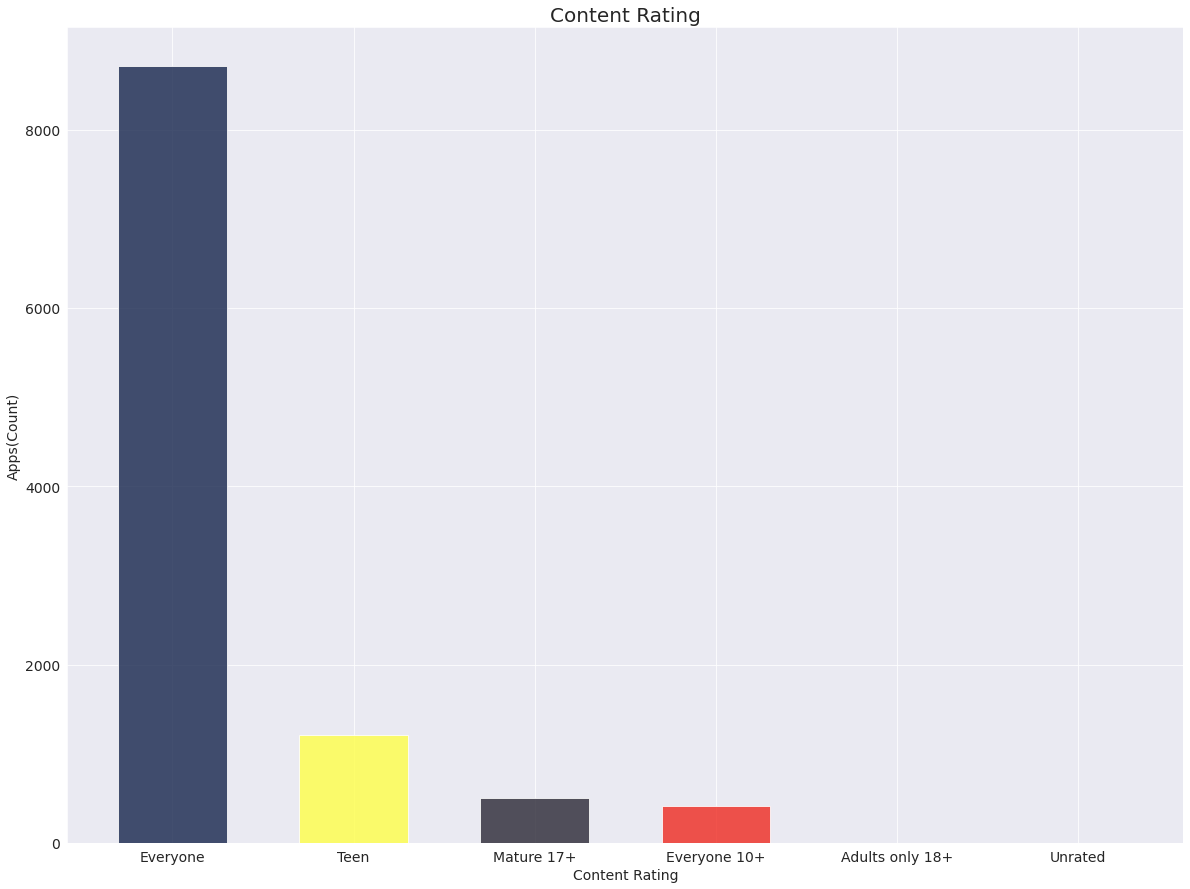

In [35]:
plt.figure(figsize=(20,15))
plt.bar(x2sis,y2sis,width=0.6,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

#Percentage of Free Vs Paid Apps

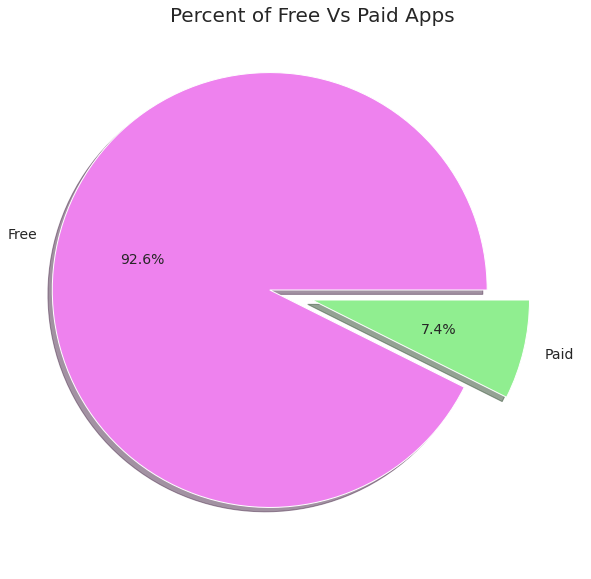

In [36]:
plt.figure(figsize=(10,10))
labels = play_store_data['Type'].value_counts(sort = True).index
sizes = play_store_data['Type'].value_counts(sort = True)
colors = ["violet","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps',size = 20)
plt.show()

#Bar Graph of Free And Paid Apps

Text(0, 0.5, 'Number of Apps')

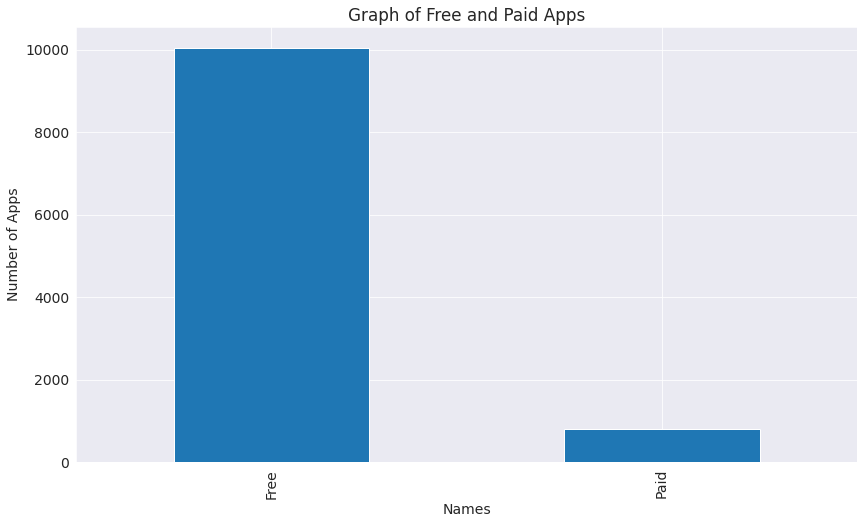

In [37]:
bar_graph = play_store_data['Type'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Graph of Free and Paid Apps")
bar_graph.set_xlabel("Names")
bar_graph.set_ylabel("Number of Apps")

#Which category has most number of install?

Text(0, 0.5, 'Number of installs')

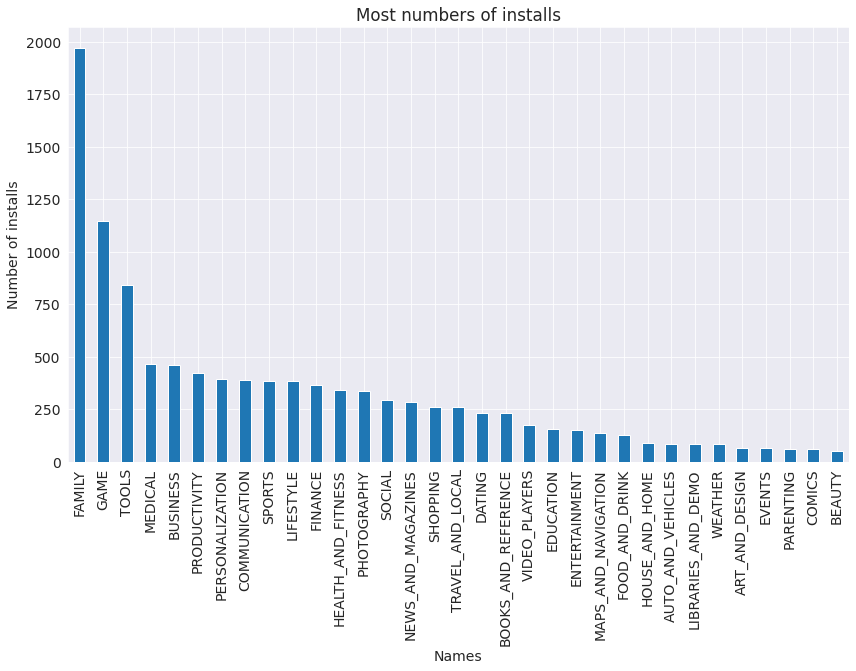

In [38]:
most_no_of_install = play_store_data['Category'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Most numbers of installs")
most_no_of_install.set_xlabel("Names")
most_no_of_install.set_ylabel("Number of installs")

#Finding Top 10 Categories in Sports

In [39]:
Categories_in_Sports = play_store_data[play_store_data.Genres == 'Sports']
print(Categories_in_Sports)

                                App Category  Rating   Reviews  \
1675                    8 Ball Pool     GAME     4.5  14198297   
1692                  Shooting King     GAME     4.4    257724   
1703                    8 Ball Pool     GAME     4.5  14198602   
1709                    Score! Hero     GAME     4.6   5418675   
1739       Dream League Soccer 2018     GAME     4.6   9882639   
...                             ...      ...     ...       ...   
10604         Florida State Gameday   SPORTS     4.7      1566   
10645  Football Manager Mobile 2018   SPORTS     3.9     11460   
10683             Hunting Safari 3D   SPORTS     4.2     36183   
10723                   Mobile Kick   SPORTS     4.3    111809   
10775            FQ - Football Quiz   SPORTS     NaN         1   

                     Size      Installs  Type  Price Content Rating  Genres  \
1675                  52M  100,000,000+  Free      0       Everyone  Sports   
1692                  69M   10,000,000+  Free    

# Top Genres in Playstore

In [40]:
topAppsinGenres = play_store_data['Genres'].value_counts().head(50)

In [41]:
x3sis = []
y3sis = []

for i in range(len(topAppsinGenres)):
    x3sis.append(topAppsinGenres.index[i])
    y3sis.append(topAppsinGenres[i])

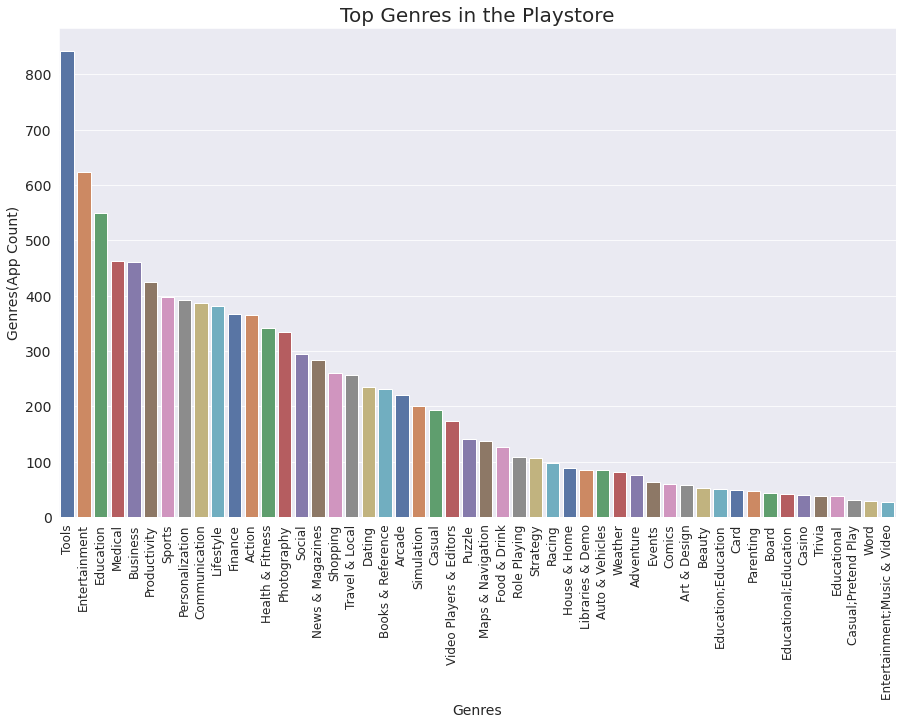

In [42]:
plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)')
plt.xlabel('Genres')
graph = sns.barplot(x=x3sis,y=y3sis,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);

#Rating of Content

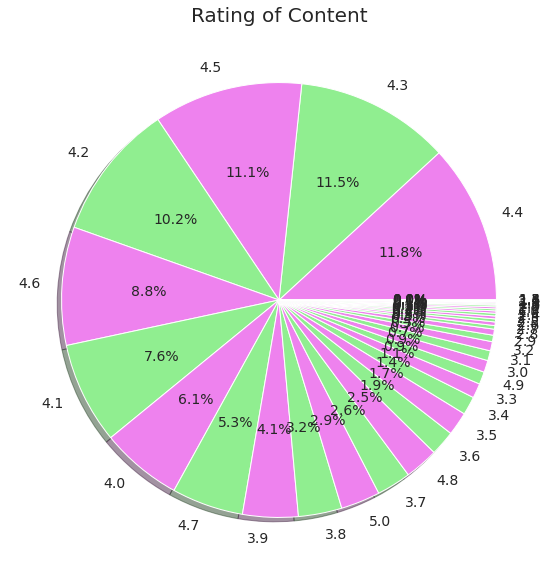

In [45]:
plt.figure(figsize=(10,10))
labels = play_store_data['Rating'].value_counts(sort = True).index
sizes = play_store_data['Rating'].value_counts(sort = True)
colors = ["violet","lightgreen"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Rating of Content',size = 20)
plt.show()

#Percentage of Review Sentiments

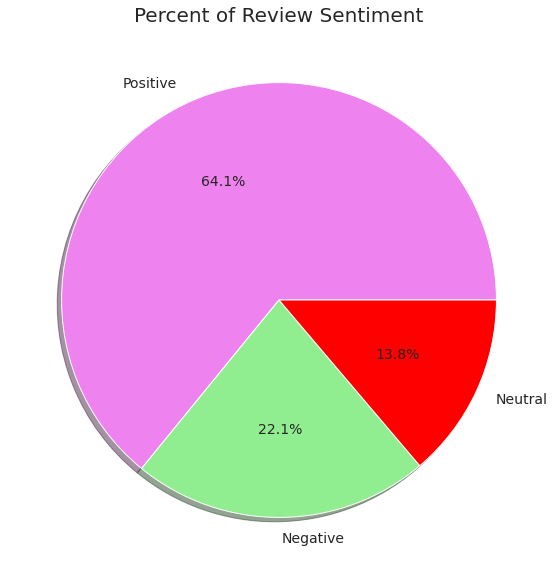

In [51]:
plt.figure(figsize=(10,10))
labels = user_review['Sentiment'].value_counts(sort = True).index
sizes = user_review['Sentiment'].value_counts(sort = True)
colors = ["violet","lightgreen","red","yellow"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Review Sentiment',size = 20)
plt.show()

#Printing Sentiments


Text(0, 0.5, 'Number of counts')

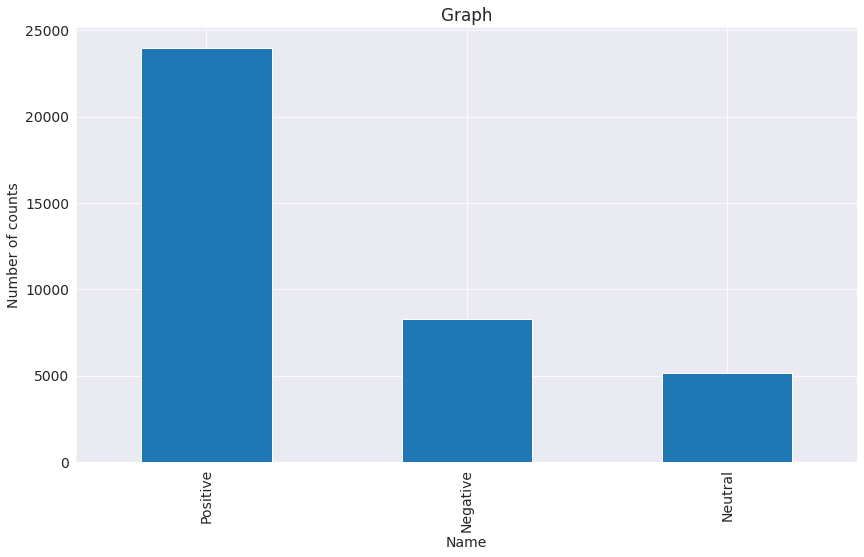

In [47]:
Sentiments = user_review['Sentiment'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Graph")
Sentiments.set_xlabel("Name")
Sentiments.set_ylabel("Number of counts")